# 01_02.Regression(예측)_pipeline을 이용한 전처리
- seaborn(그래프 그리기): https://seaborn.pydata.org/index.html
- Pipelines:  https://scikit-learn.org/stable/modules/compose.html
- Mixed type 처리: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

In [ ]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn import linear_model

## 6.모델검정

# 7.최적화


## 2.데이터 불러오기

### 2.1 구글 드라이브와 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/주택가격.csv', encoding="cp949")
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

In [ ]:
housing_df.shape

(1180, 14)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1180 non-null   int64
 1   가격      1180 non-null   int64
 2   연면적     1180 non-null   int64
 3   품질      1180 non-null   int64
 4   상태      1180 non-null   int64
 5   건축년도    1180 non-null   int64
 6   리모델링년도  1180 non-null   int64
 7   지하면적    1180 non-null   int64
 8   차고면적    1180 non-null   int64
 9   면적_1층   1180 non-null   int64
 10  면적_2층   1180 non-null   int64
 11  주거유형    1180 non-null   int64
 12  판매유형    1180 non-null   int64
 13  판매조건    1180 non-null   int64
dtypes: int64(14)
memory usage: 129.2 KB


In [ ]:
housing_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

## 3.데이터 전처리

### 3.1 필요없는 변수 제거

In [ ]:
housing_df = housing_df.drop (['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
housing_df['주거유형'] = housing_df['주거유형'].replace ([1,2,3,4,5], ['단독주택','2가구변경','듀플렉스','타운젠트바깥쪽','타운젠트안쪽'])
housing_df['판매유형'] = housing_df['판매유형'].replace ([1,2], ['보증증서','법원관리증서'])
housing_df['판매조건'] = housing_df['판매조건'].replace ([1,2], ['정상판매','압류및공매도'])
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,181500,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,223500,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,140000,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [ ]:
# 수치형 변수
housing_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
가격,1180.0,162496.03,52794.56,34900.0,127000.00,153537.5,191000.00,335000.0
연면적,1180.0,9185.11,3335.75,1300.0,7262.75,9143.0,11040.00,20781.0
품질,1180.0,5.86,1.21,1.0,5.00,6.0,7.00,9.0
상태,1180.0,5.66,1.14,1.0,5.00,5.0,6.00,9.0
건축년도,1180.0,1967.46,29.36,1872.0,1950.00,1969.0,1995.00,2009.0
리모델링년도,1180.0,1982.33,20.42,1950.0,1964.00,1988.0,2002.00,2010.0
지하면적,1180.0,989.73,366.31,0.0,780.00,944.0,1192.25,3206.0
차고면적,1180.0,439.83,189.13,0.0,308.00,456.0,550.00,1043.0
면적_1층,1180.0,1099.72,328.27,334.0,864.00,1040.0,1288.75,2898.0
면적_2층,1180.0,329.04,407.93,0.0,0.00,0.0,711.25,1818.0


In [ ]:
# 범주형 변수
# lecture_df.columns
categorical_features=['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    cat = housing_df[col].value_counts()
    print(cat)

단독주택       988
타운젠트바깥쪽     90
타운젠트안쪽      41
듀플렉스        37
2가구변경       24
Name: 주거유형, dtype: int64
보증증서      1139
법원관리증서      41
Name: 판매유형, dtype: int64
정상판매      1090
압류및공매도      90
Name: 판매조건, dtype: int64


### 4.2 그래프 그리기

In [ ]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

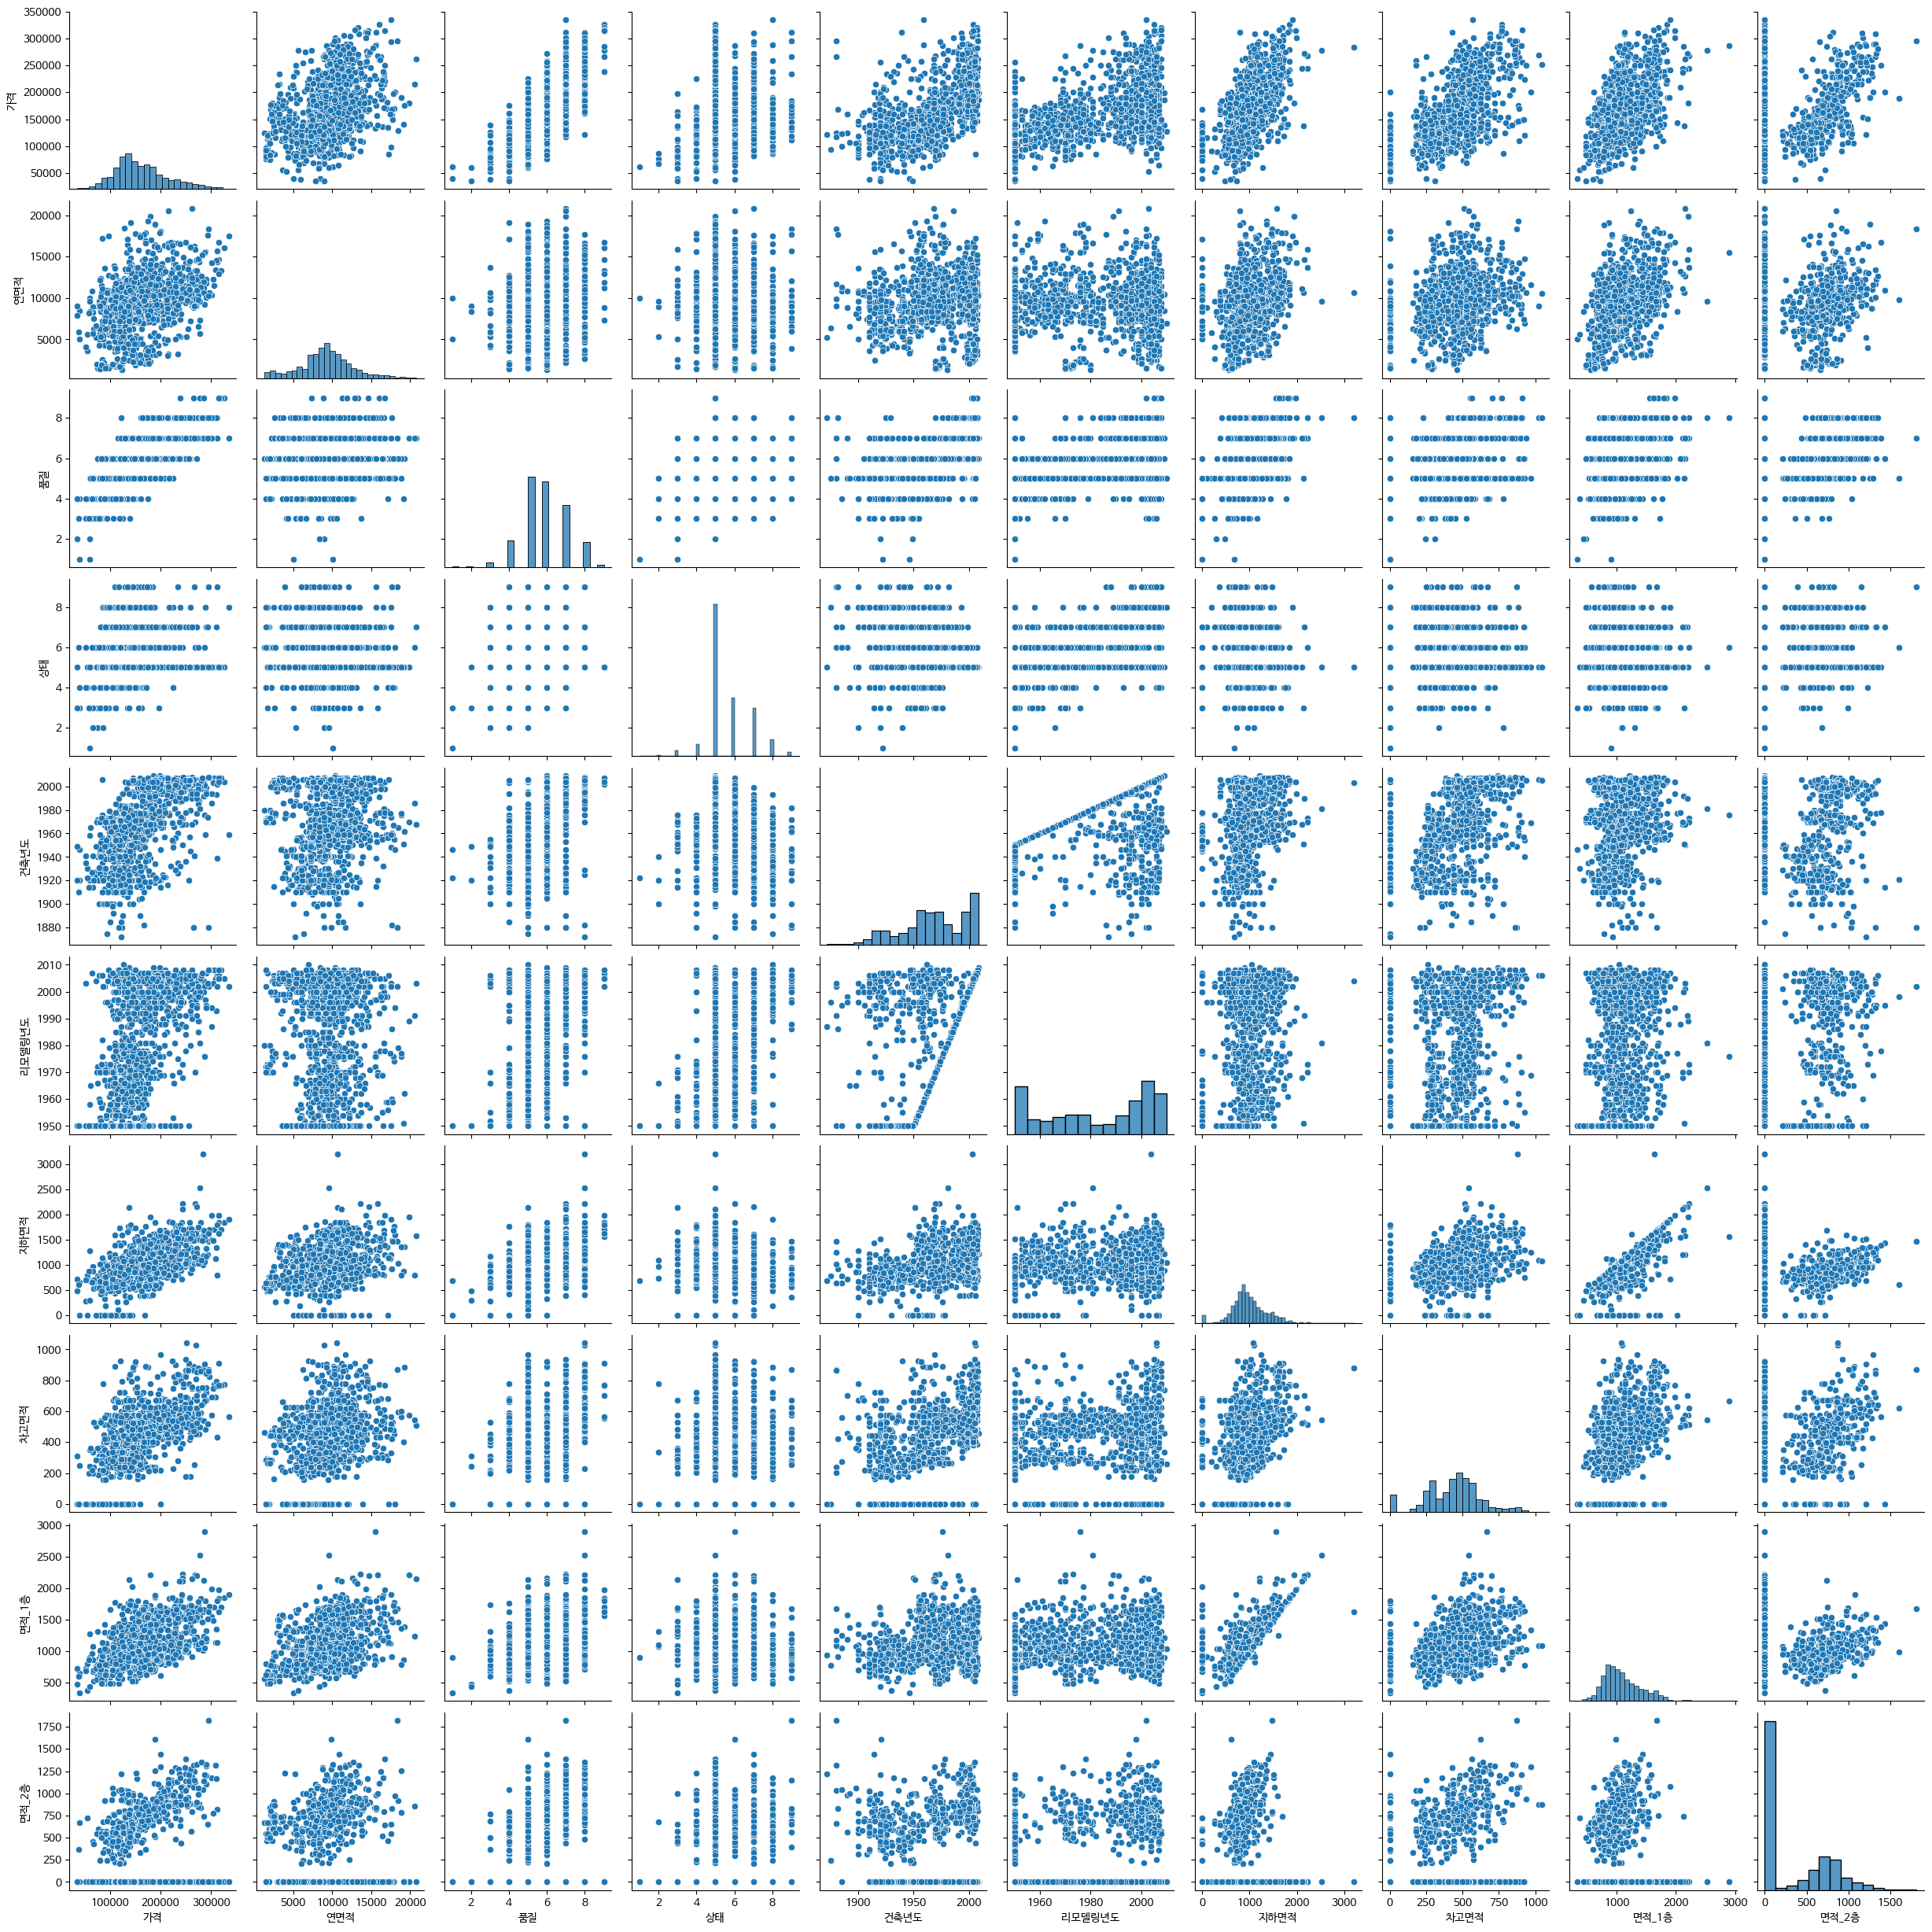

In [ ]:
# 수치형 변수
g = sns.pairplot(housing_df)

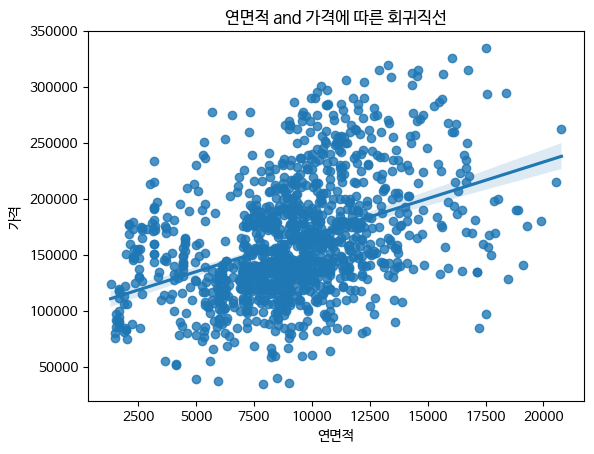

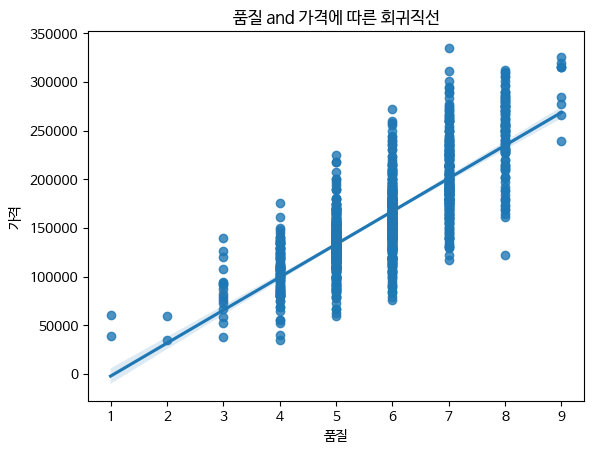

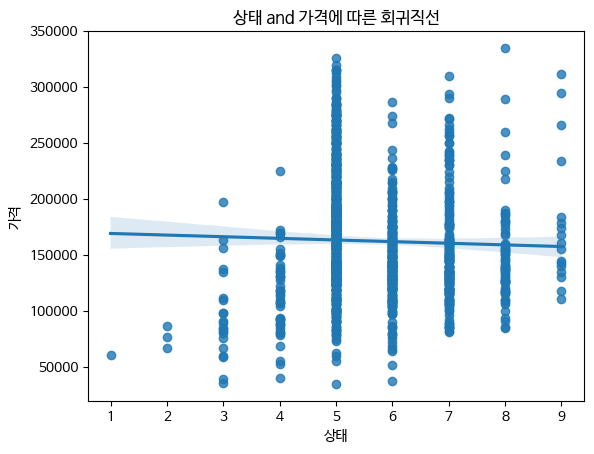

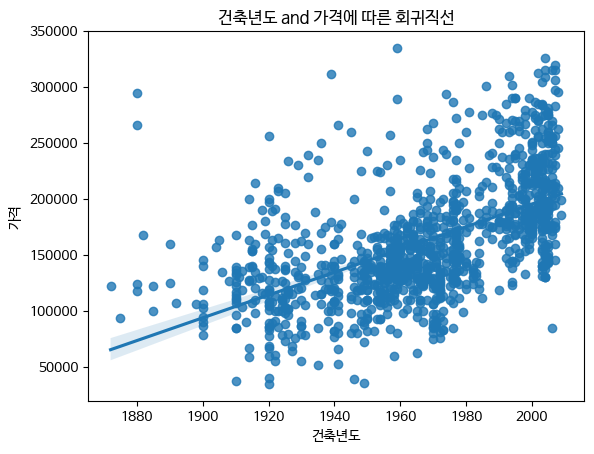

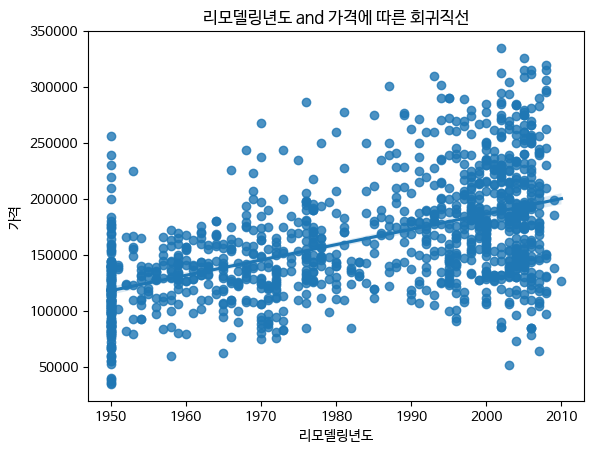

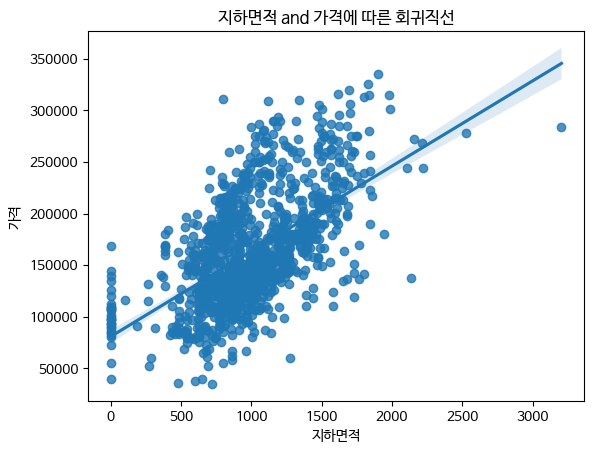

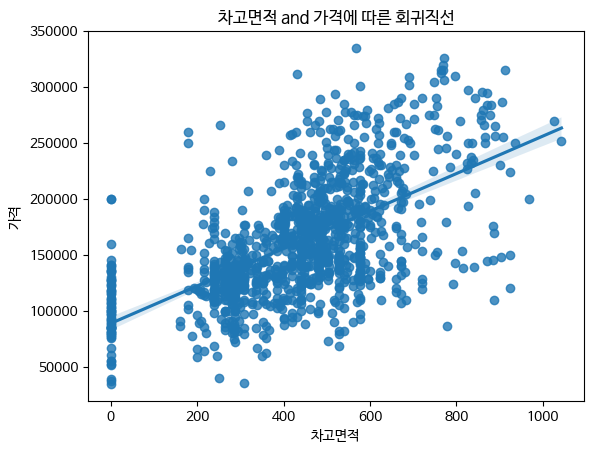

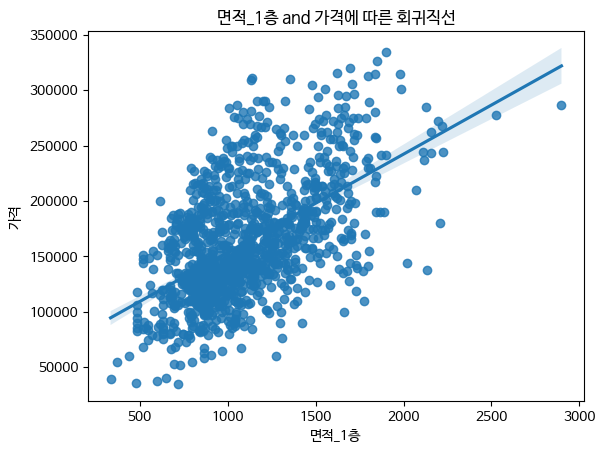

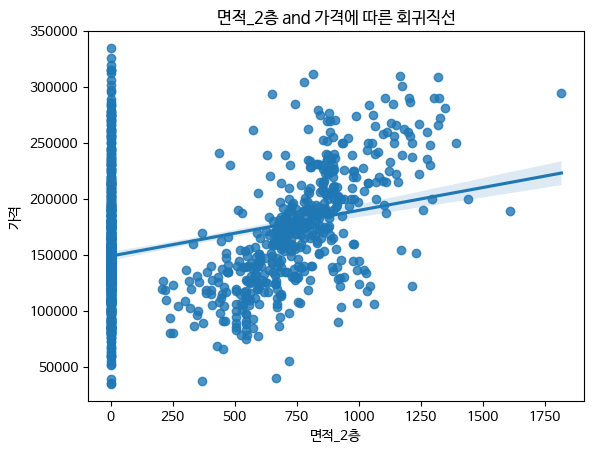

In [ ]:
# 변수별 선형회귀직선
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']
for var in numeric_features:
    plt.figure()
    sns.regplot(x = var, y = '가격', data = housing_df).set(title=f'{var}에 따른 가격 회귀직선');

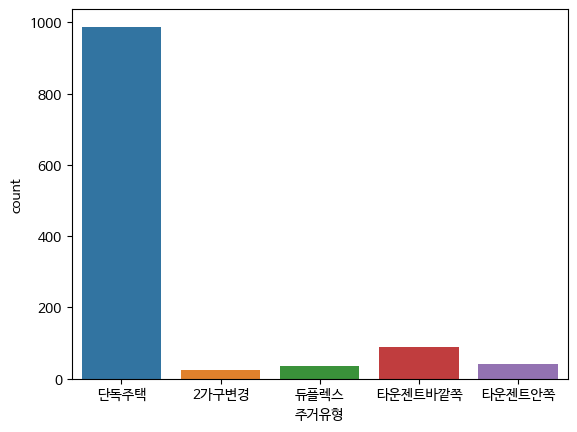

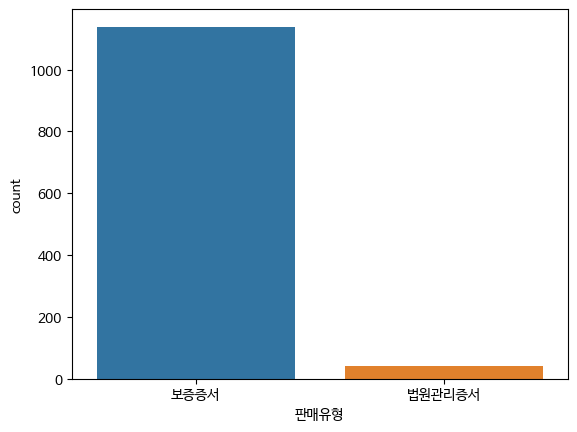

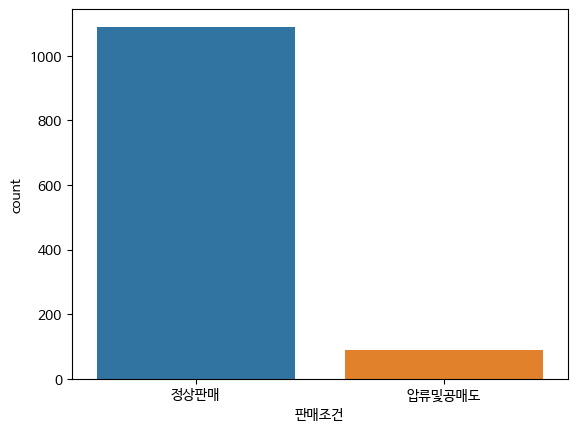

In [ ]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data = housing_df)
    plt.show()

## 5.훈련/테스트용 데이터 분할


### 5.1 data와 target으로 분리
- data: X, target: y 로 분리

- X 추출


In [ ]:
# X 추출법(3): y값만 제거
X = housing_df.drop (['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


- target(y) 추출
- y 값을 series에서 배열로 변환

In [ ]:
y = housing_df['가격']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: 가격, dtype: int64

In [ ]:
# 선형모델의 y 값 표준화
y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()
y

array([ 0.87174655,  0.3601134 ,  1.15598719, ...,  1.97081036,
       -0.38601829, -0.28416539])

### 5.2 훈련용 및 테스트용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할(분류모형일때 사용)

In [ ]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 433 to 1061
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연면적     826 non-null    int64 
 1   품질      826 non-null    int64 
 2   상태      826 non-null    int64 
 3   건축년도    826 non-null    int64 
 4   리모델링년도  826 non-null    int64 
 5   지하면적    826 non-null    int64 
 6   차고면적    826 non-null    int64 
 7   면적_1층   826 non-null    int64 
 8   면적_2층   826 non-null    int64 
 9   주거유형    826 non-null    object
 10  판매유형    826 non-null    object
 11  판매조건    826 non-null    object
dtypes: int64(9), object(3)
memory usage: 83.9+ KB


In [ ]:
y_train.shape

(826,)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 660 to 678
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연면적     354 non-null    int64 
 1   품질      354 non-null    int64 
 2   상태      354 non-null    int64 
 3   건축년도    354 non-null    int64 
 4   리모델링년도  354 non-null    int64 
 5   지하면적    354 non-null    int64 
 6   차고면적    354 non-null    int64 
 7   면적_1층   354 non-null    int64 
 8   면적_2층   354 non-null    int64 
 9   주거유형    354 non-null    object
 10  판매유형    354 non-null    object
 11  판매조건    354 non-null    object
dtypes: int64(9), object(3)
memory usage: 36.0+ KB


In [ ]:
y_test.shape

(354,)

## 6.pipeline으로 데이터 전처리
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- R에서 recipe
- 범주형 변수: OneHotEncoder
- 수치형 변수:
- 선형모델은 StandardScaler 로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [ ]:
## 3.데이터 전처리
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.preprocessing import LabelEncoder

In [ ]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')), # 누락된 값은 중앙값으로 처리
        ('scaler', StandardScaler())
    ]
)

# 범주형 변수(y는 제외)
categorical_features=['주거유형', '판매유형', '판매조건']

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),  # 누락된 값은 missing으로 상수 처리
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
                                  '차고면적', '면적_1층', '면적_2층']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['주거유형', '판매유형', '판매조건'])])

### 6.2 데이터 전처리 결과 확인
- https://www.kaggle.com/code/thomasswain/titanic-classifier

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.596577,-0.709282,1.204375,0.067463,-0.614537,-0.610066,0.965758,-1.005785,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.494475,-1.529824,-0.588082,-0.106458,-0.860567,-0.093881,-0.052596,-0.425396,-0.789563,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.075530,-0.709282,-0.588082,0.206599,-0.417714,-0.265943,-2.343893,-0.618859,1.430503,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-2.147846,-0.709282,-0.588082,0.067463,-0.614537,-0.981073,-0.010165,-1.422939,0.875486,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-0.894487,-0.709282,-1.484311,-1.115198,-1.598655,-0.265943,-1.070950,-0.618859,0.320470,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 7.모델만들기 (모델 설정)
- R에서 workflow
- 예측모델: 000_reg
- 분류모델: 000_clf

### 7.1 pipeline으로 모델 연결

In [ ]:
lr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("lr_reg", linear_model.LinearRegression())                           # LinearRegression(Lasso)
    ]
)

## 8.모델 훈련(모델 학습)
- machine learning

### 8.1 모델 훈련하기(learning)

In [ ]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('lr_reg', LinearRegression())])

### 8.2 중요변수확인

In [ ]:
lr_pipe["lr_reg"].coef_   # lr_reg -> lr_pipe["lr_reg"]

array([ 0.09057885,  0.2663037 ,  0.1312569 ,  0.24648795,  0.07460064,
        0.16853582,  0.09770333,  0.31048773,  0.33567935, -0.0043483 ,
        0.16497096, -0.22564732,  0.10616907, -0.04114441, -0.0547981 ,
        0.0547981 , -0.08586051,  0.08586051])

In [ ]:
# 중요도 점수 계산
feature = lr_pipe['preprocessor'].get_feature_names_out()             # lr_pipe
importances = lr_pipe["lr_reg"].coef_         # lr_pipe["lr_reg"]
importances = importances.flatten()                           # flatten() - 다차원 array를 1차원 array로 변환
output = pd.DataFrame([feature , importances],
                      index = ["feature","importances"]).T
output.sort_values(["importances"],
                   ascending= False ,
                   inplace=True)

output

,feature,importances
8,num__면적_2층,0.335679
7,num__면적_1층,0.310488
1,num__품질,0.266304
3,num__건축년도,0.246488
5,num__지하면적,0.168536
10,cat__주거유형_단독주택,0.164971
2,num__상태,0.131257
12,cat__주거유형_타운젠트바깥쪽,0.106169
6,num__차고면적,0.097703
0,num__연면적,0.090579


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


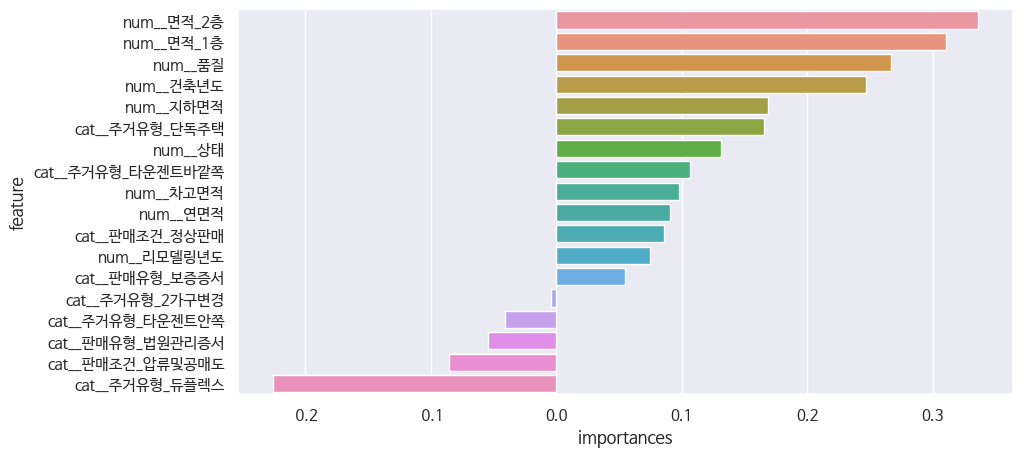

In [ ]:
# 그래프 그리기

plt.rc('font', family='NanumBarunGothic')

fig ,ax = plt.subplots(figsize=(10, 5))
sns.set(font_scale = 1)
ax = sns.barplot(y="feature", x="importances", data=output)
plt.show()

## 9.모델 test 및 검정

### 9.1 검증용 데이터로 예측
- predict (class로 표시)
- predict_proba (확률값으로 표시): 분류모델에서 사용

In [ ]:
y_pred = lr_pipe.predict(X_test) # lr_reg -> lr_pipe
y_pred

array([ 1.10804422, -1.1473271 , -2.04336104,  0.75651372,  0.24538884,
        0.87148729, -0.28343871, -0.89420332, -0.41069959, -0.38034147,
        0.05249817, -0.38034147, -0.57672738,  0.09360159, -0.37874844,
       -0.26800213, -0.05166476, -1.05412572, -0.34849731,  0.35298084,
       -0.7085125 ,  0.25715717, -0.38034147,  1.23081013,  1.25904289,
        1.44629011,  0.11680455, -0.9284752 ,  0.67728414, -1.56746591,
       -1.83553186, -0.51439258, -0.48445311,  0.84797044,  1.62312589,
        0.97969633,  1.9688405 ,  0.55931769,  0.85331517,  1.04528621,
       -0.29562493,  0.15336434,  0.89812623, -0.60270831,  1.67971915,
       -1.26309721, -0.71117334, -1.52746182,  0.89303871, -0.02429581,
        0.83412273, -0.662868  ,  0.22205732,  1.00672248,  0.34789603,
        0.89848783,  1.24169874, -0.17858509, -0.93356415, -1.54960079,
       -0.63382754,  0.63692554, -0.06782782,  0.32160205,  1.62728824,
       -0.36049976, -0.33355053,  0.2197487 , -0.42861648, -0.78

### 9.2 실제값과 예측값 확인

In [ ]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
0,1.411804,1.108044
1,-1.023570,-1.147327
2,-1.705369,-2.043361
3,1.487601,0.756514
4,0.316530,0.245389
...,...,...
349,1.203361,0.990285
350,1.960938,1.209504
351,0.578031,0.364665
352,1.080190,1.168001


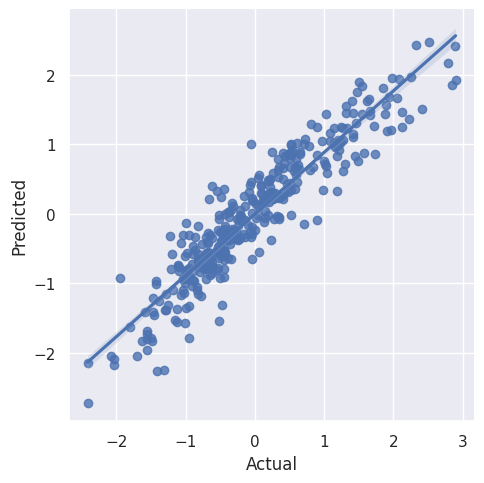

In [ ]:
sns.lmplot(x ='Actual', y ='Predicted', data = output)